Data Preparation and Cleaning
Here we will read the data from the CSV file and clean the data as per our purposes. 
We will drop the NaN values and split the dataset into movies and TV Shows datasets.

In [1]:
import pandas as pd
netflix_df = pd.read_csv('Netflix_Data.csv')

In [2]:
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix_df.shape

(8807, 12)

In [4]:
netflix_df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [5]:
netflix_df.dropna(inplace = True)

In [6]:
netflix_df.count()

show_id         5332
type            5332
title           5332
director        5332
cast            5332
country         5332
date_added      5332
release_year    5332
rating          5332
duration        5332
listed_in       5332
description     5332
dtype: int64

In [7]:
netflix_df.date_added = pd.to_datetime(netflix_df.date_added)

In [8]:
netflix_shows = netflix_df[netflix_df.type == "TV Show"]

In [9]:
netflix_movies = netflix_df[netflix_df.type == "Movie"]

Exploratory Analysis and Visualization
Here we will do some exploratory analysis. We will check how the dataset is distributed and check the content of the dataset.

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


Lets check the how many entries for movies and TV shows are there in the dataset.

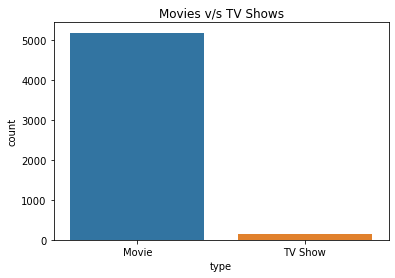

In [11]:
plt.title("Movies v/s TV Shows")
sns.countplot(x= netflix_df.type);

Lets check distribution of when the movies were release

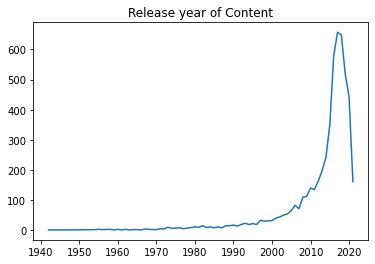

In [12]:
plt.title("Release year of Content")
plt.plot(netflix_df.groupby(by = ["release_year"]).release_year.count());

Lets check the distribution of the ratings of the movies

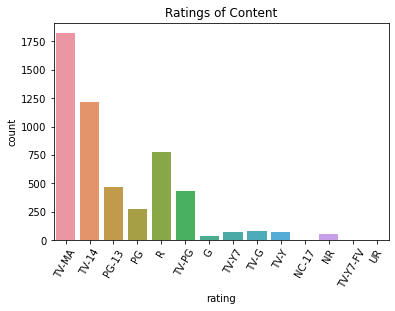

In [13]:
plt.title("Ratings of Content")
plt.xticks(rotation=60)
sns.countplot(x= netflix_df.rating);

Lets check the oldest 15 movies from the dataset.

In [14]:
# 15 oldest movies in the dataset
netflix_movies.sort_values("release_year").title.head(15)

8205       The Battle of Midway
8640           Tunisian Victory
7219    Know Your Enemy - Japan
7294         Let There Be Light
8587                Thunderbolt
1699            White Christmas
2375            The Blazing Sun
7954        Scandal in Sorrento
8506          The Sign of Venus
7839      Rebel Without a Cause
6784           Forbidden Planet
2369                Dark Waters
6431      Cat on a Hot Tin Roof
2368              Cairo Station
6853                       Gigi
Name: title, dtype: object

Lets check the 15 oldest TV Shows from the dataset.

In [15]:
#15 oldest TV shows in the dataset
netflix_shows.sort_values("release_year").title.head(15)

7175                             Ken Burns: The Civil War
8214     The Blue Planet: A Natural History of the Oceans
7748                Planet Earth: The Complete Collection
3541                                               Naruto
803                           Ouran High School Host Club
5096                     Fullmetal Alchemist: Brotherhood
6838                                     Geronimo Stilton
6810                                        Frozen Planet
316                                          Office Girls
8293                                             The Fear
5674                                               Merlin
3614                                           Reply 1997
3137                                     Girls und Panzer
6371                                     Brave Miss World
7648    Oliver Stone's Untold History of the United St...
Name: title, dtype: object

In this section we will be asking some questions about the dataset and try to answer them from the data available.

Q1: Which country has the highest no of movies and TV shows?

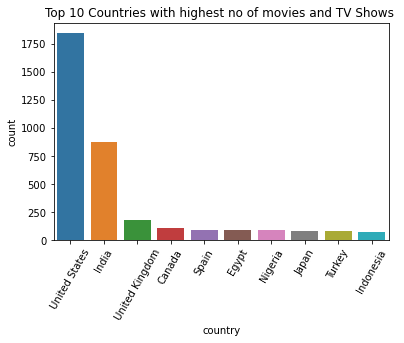

In [16]:
plt.title("Top 10 Countries with highest no of movies and TV Shows ")
plt.xticks(rotation=60)
sns.countplot(x = netflix_df.country, order = netflix_df['country'].value_counts().index[0:10]);

From the above chart, we can see that United States is producing the highest number of Movies as well as TV Shows.

Q2: Which month are the most no of movies released?

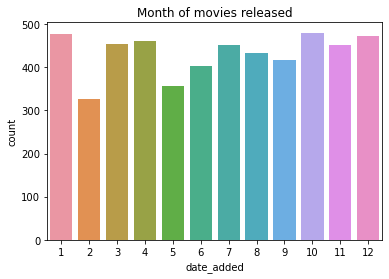

In [17]:
plt.title("Month of movies released")
release_month= netflix_movies.date_added.dt.month
sns.countplot(x= release_month);

We can see that the highest number of movies are released around the holiday season i.e November, December and January.

Q3: How long is the duration of a average movie?

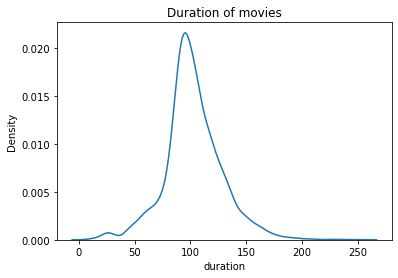

In [18]:
plt.title("Duration of movies")
netflix_movies_duration = netflix_movies["duration"].str.replace("min","")
sns.kdeplot(data=netflix_movies_duration.astype(int));

The average duration of movie is about 90-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.

Q4: How many seasons does a average TV show have?

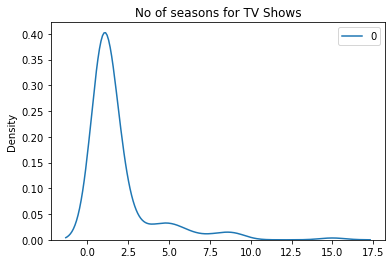

In [19]:
plt.title("No of seasons for TV Shows")
netflix_show_duration = netflix_shows["duration"].str.extract('(\d+)')
sns.kdeplot(data=netflix_show_duration.astype(int));

The average looks to be about 1-2.5 seasons.

Q5: How does India perform in the area of content creation 

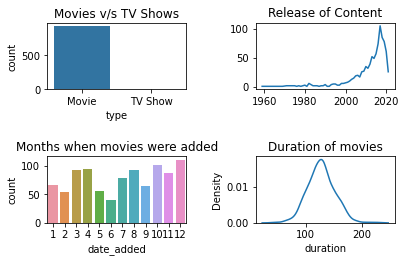

In [20]:
#making a df for indian content
india_content= netflix_df[netflix_df["country"].str.contains('India')]
fig, axes = plt.subplots(2, 2)

#graph 1
axes[0][0].set_title("Movies v/s TV Shows")
sns.countplot(x=india_content.type, ax=axes[0,0]);

#graph 2
axes[0][1].set_title("Release of Content")
axes[0][1].plot(india_content.groupby(by = ["release_year"]).release_year.count());

#graph 3
axes[1][0].set_title("Months when movies were added")
sns.countplot(x= india_content.date_added.dt.month, ax=axes[1,0]);

#graph 4
axes[1][1].set_title("Duration of movies")
indian_movies = india_content[india_content.type == "Movie"]
indian_movies_duration = indian_movies["duration"].str.replace("min","")
sns.kdeplot(data=indian_movies_duration.astype(int));

plt.tight_layout(pad=2);

We can see that India is more into producing movies than TV Shows. The release of new content has picked up pace since the 2000s. India is on par with the world when it comes to the duration of movies.